In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('OnlineRetail.csv')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df = df.drop_duplicates()

In [9]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [10]:
df[df.Quantity < 1].shape

(10587, 8)

In [11]:
df[df.UnitPrice <= 0].shape

(2512, 8)

In [12]:
#Removing null values
df = df[df['CustomerID'].notna()]
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [64]:
df['CustomerID'] = df['CustomerID'].astype(int)
df['InvoiceNo'] = df['InvoiceNo'].astype(int)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')
df['InvoiceDate'] = df['InvoiceDate'].apply(lambda x: x.date())

In [14]:
df['TotalCost'] = df['Quantity']*df['UnitPrice']

In [65]:
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01,1.85,17850,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01,1.69,13047,United Kingdom,54.08


In [75]:
#df['TotalCost'] = df['Quantity']*df['UnitPrice']
#df2 = df.groupby(['Country','CustomerID', 'InvoiceNo','InvoiceDate' ]).agg(Mean=('TotalCost', np.sum)).reset_index()
df2 = df.groupby(['Country','CustomerID', 'InvoiceNo','InvoiceDate' ])['TotalCost'].sum().reset_index()


In [76]:
maxdate = df2['InvoiceDate'].max()
df2['Recency'] = df2['InvoiceDate'].apply(lambda x: maxdate - x) 

In [85]:
df2['InvoiceDate'].min()

datetime.date(2010, 12, 1)

In [77]:
df2

,Country,CustomerID,InvoiceNo,InvoiceDate,TotalCost,Recency
0,Australia,12386,537676,2010-12-08,258.90,366 days
1,Australia,12386,540280,2011-01-06,143.00,337 days
2,Australia,12388,541271,2011-01-17,431.30,326 days
3,Australia,12388,543357,2011-02-07,124.05,305 days
4,Australia,12388,546135,2011-03-09,210.90,275 days
...,...,...,...,...,...,...
18527,Unspecified,12743,561661,2011-07-28,195.33,134 days
18528,Unspecified,14265,559929,2011-07-14,252.05,148 days
18529,Unspecified,14265,564051,2011-08-22,278.13,109 days
18530,Unspecified,16320,552695,2011-05-10,852.68,213 days


In [72]:
df2['Country'].value_counts()

United Kingdom          16646
Germany                   457
France                    389
EIRE                      260
Belgium                    98
Netherlands                94
Spain                      90
Australia                  57
Portugal                   57
Switzerland                51
Finland                    41
Italy                      38
Norway                     36
Sweden                     36
Channel Islands            26
Poland                     19
Japan                      19
Denmark                    18
Austria                    17
Cyprus                     16
Unspecified                 8
Iceland                     7
Singapore                   7
Canada                      6
Malta                       5
Israel                      5
Greece                      5
USA                         5
Lithuania                   4
European Community          4
United Arab Emirates        3
Czech Republic              2
Bahrain                     2
Lebanon   

<AxesSubplot:xlabel='count', ylabel='Country'>

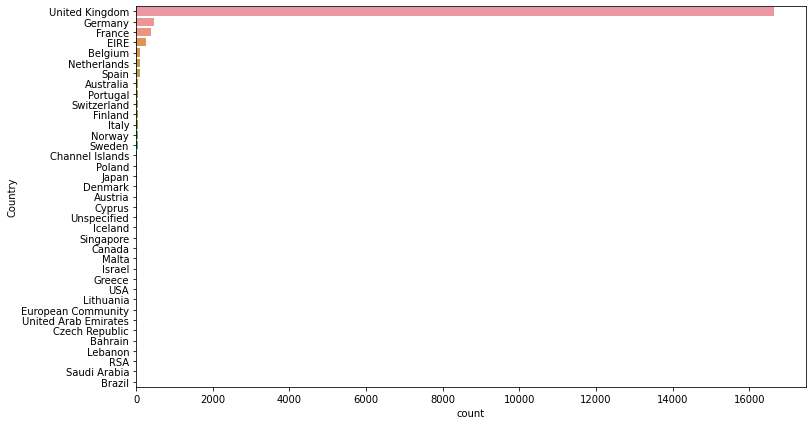

In [73]:
plt.figure(figsize=(12,7))
sns.countplot(y = df2['Country'], order = df2['Country'].value_counts().index, orient ='h')

#no of orders per country

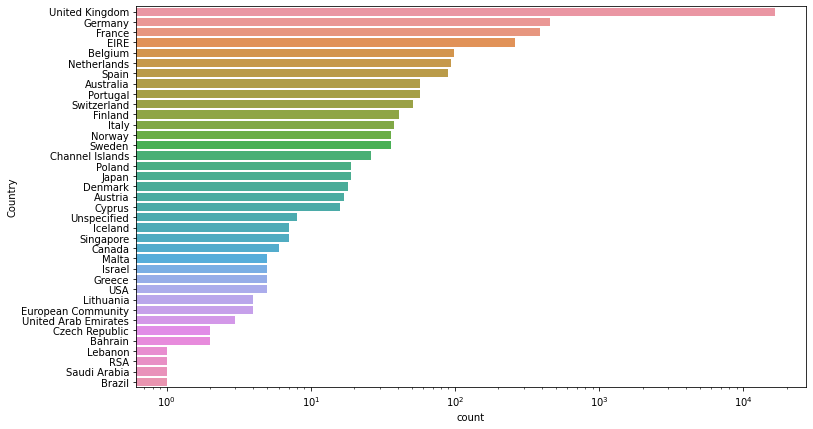

In [23]:
plt.figure(figsize=(12,7))
c = sns.countplot(y = df2['Country'], order = df2['Country'].value_counts().index, orient ='h')
c.set_xscale("log")

In [52]:
#Number of Customer per country
df3 = df2.groupby(['Country'])[['CustomerID']].nunique().reset_index().sort_values('CustomerID', ascending = False)
df3

,Country,CustomerID
35,United Kingdom,3920
14,Germany,94
13,France,87
30,Spain,30
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,14
12,Finland,12
1,Austria,11


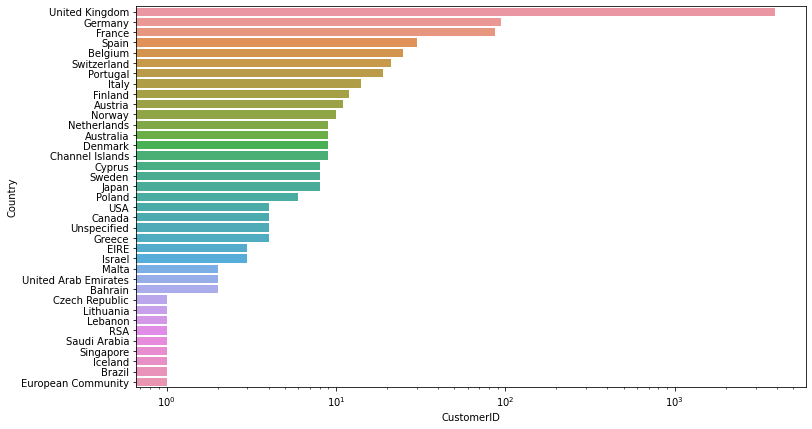

In [37]:
#Number of Customer per country
plt.figure(figsize=(12,7))
c = sns.barplot(y = df3['Country'], x = df3.CustomerID,  orient ='h')
c.set_xscale("log")

In [53]:
#Total order amount per country
df3 = df2.groupby(['Country'])[['TotalCost']].sum().reset_index().sort_values('TotalCost', ascending = False)
df3

,Country,TotalCost
35,United Kingdom,7285024.644
23,Netherlands,285446.340
10,EIRE,265262.460
14,Germany,228678.400
13,France,208934.310
0,Australia,138453.810
30,Spain,61558.560
32,Switzerland,56443.950
3,Belgium,41196.340
31,Sweden,38367.830


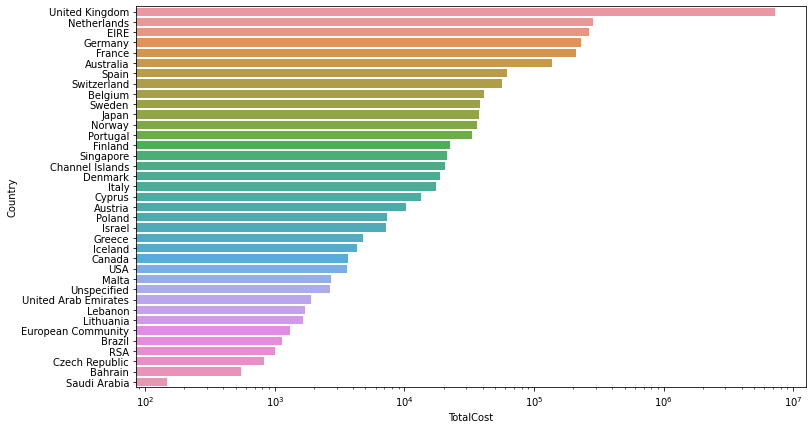

In [41]:
#Total order amount per country
plt.figure(figsize=(12,7))
c = sns.barplot(y = df3['Country'], x = df3.TotalCost,  orient ='h')
c.set_xscale("log")

In [94]:
df2[df2['CustomerID']==12346]

,Country,CustomerID,InvoiceNo,InvoiceDate,TotalCost,Recency
1399,Iceland,12347,537626,2010-12-07,711.79,367 days
1400,Iceland,12347,542237,2011-01-26,475.39,317 days
1401,Iceland,12347,549222,2011-04-07,636.25,246 days
1402,Iceland,12347,556201,2011-06-09,382.52,183 days
1403,Iceland,12347,562032,2011-08-02,584.91,129 days
1404,Iceland,12347,573511,2011-10-31,1294.32,39 days
1405,Iceland,12347,581180,2011-12-07,224.82,2 days


In [93]:
df3 = df2.groupby(['CustomerID'], as_index=False).agg(Recency=('Recency', 'min'), Frequency=('InvoiceNo', 'nunique'), TotalCost=('TotalCost', np.sum))
df3


,CustomerID,Recency,Frequency,TotalCost
0,12346,325 days,1,77183.60
1,12347,2 days,7,4310.00
2,12348,75 days,4,1797.24
3,12349,18 days,1,1757.55
4,12350,310 days,1,334.40
...,...,...,...,...
4333,18280,277 days,1,180.60
4334,18281,180 days,1,80.82
4335,18282,7 days,2,178.05
4336,18283,3 days,16,2045.53


In [97]:
df3['Recency'] = df3['Recency'].dt.days
df4 = df3[['Recency',	'Frequency',	'TotalCost']]
df4

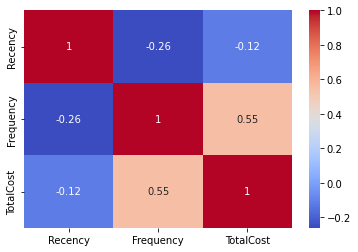

In [119]:
sns.heatmap(df4.corr(),annot=True, cmap="coolwarm");


<AxesSubplot:>

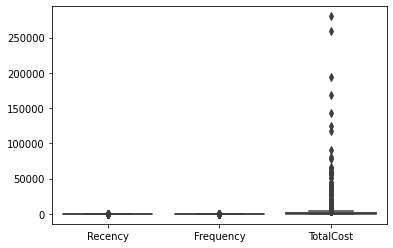

In [122]:
sns.boxplot(data = df4)

In [123]:
df4.shape

(4338, 3)

In [125]:
Q1 = df4['TotalCost'].quantile(0.05)
Q3 = df4['TotalCost'].quantile(0.95)
IQR = Q3 - Q1
df4 = df4[(df4['TotalCost']>= Q1 - 1.5*IQR) & (df4['TotalCost']<= Q3 + 1.5*IQR)]

Q1 = df4['Recency'].quantile(0.05)
Q3 = df4['Recency'].quantile(0.95)
IQR = Q3 - Q1
df4 = df4[(df4['Recency']>= Q1 - 1.5*IQR) & (df4['Recency']<= Q3 + 1.5*IQR)]

Q1 = df4['Frequency'].quantile(0.05)
Q3 = df4['Frequency'].quantile(0.95)
IQR = Q3 - Q1
df4 = df4[(df4['Frequency']>= Q1 - 1.5*IQR) & (df4['Frequency']<= Q3 + 1.5*IQR)]

In [126]:
df4.shape

(4260, 3)

In [132]:
scaler = StandardScaler()
df_final = scaler.fit_transform(df4)

In [133]:
df_final = pd.DataFrame(df_final)
df_final.columns = [ 'Frequency' , 'Recency', 'TotalCost']
df_final.head()

,Frequency,Recency,TotalCost
0,-0.912751,0.872276,1.666497
1,-0.183387,0.095271,0.267936
2,-0.752890,-0.681733,0.245845
3,2.164565,-0.681733,-0.546258
4,-0.573047,1.131277,0.662442


In [129]:
sse = []
for cluster in range(1,20):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(df_final)
    sse.append(kmeans.inertia_)

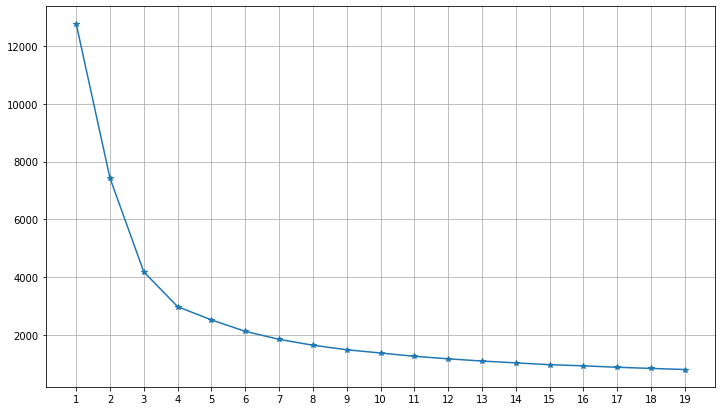

In [130]:
x = np.arange(1,20)
plt.figure(figsize=(12,7))
plt.plot(x,sse, marker = '*')
plt.xticks(x)
plt.grid()
plt.show()

In [139]:
km = KMeans(n_clusters=4, init = 'k-means++')


In [140]:
y_pred = km.fit_predict(df_final)
df_final['Cluster']= y_pred
df_final.head()

,Frequency,Recency,TotalCost,Cluster
0,-0.912751,0.872276,1.666497,3
1,-0.183387,0.095271,0.267936,1
2,-0.752890,-0.681733,0.245845,1
3,2.164565,-0.681733,-0.546258,0
4,-0.573047,1.131277,0.662442,3


c:\Users\Akash Nambiar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency', ylabel='Recency'>

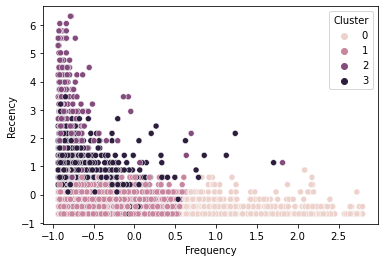

In [142]:
sns.scatterplot(df_final.Frequency, df_final.Recency, hue = df_final.Cluster)

c:\Users\Akash Nambiar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalCost', ylabel='Recency'>

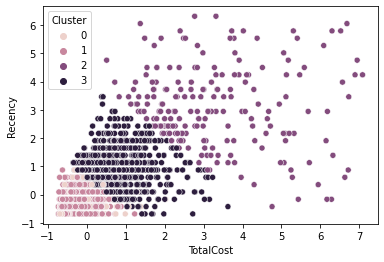

In [143]:
sns.scatterplot(df_final.TotalCost, df_final.Recency, hue = df_final.Cluster)

<AxesSubplot:xlabel='Frequency', ylabel='Recency'>

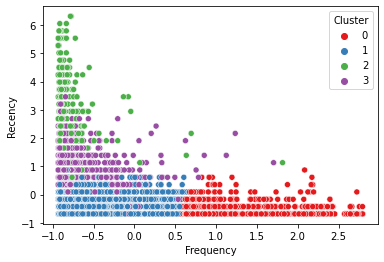

In [162]:
sns.scatterplot(x = 'Frequency', y = 'Recency', data = df_final, hue = df_final.Cluster, palette = 'Set1')